In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
from datetime import datetime
startdate = datetime(2022,12,1)
enddate = datetime(2022,12,15)
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  3 of 3 completed


In [ ]:
data.head()

Adj Close                                Close              \
                ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS   
Date                                                                      
2022-12-01  332.231232  193.808853   222.775269  339.549988  195.949997   
2022-12-02  329.882996  194.451767   223.171570  337.149994  196.600006   
2022-12-05  329.491608  188.962402   222.131256  336.750000  191.050003   
2022-12-06  330.029755  194.253937   226.688812  337.299988  196.399994   
2022-12-07  332.769409  185.302841   223.766037  340.100006  187.350006   

                               High                                  Low  \
           TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS      ITC.NS   
Date                                                                       
2022-12-01   224.850006  341.700012  201.899994   227.149994  336.799988   
2022-12-02   225.250000  340.799988  198.649994   226.350006  336.750000   
2022-12-05   224.199997  338.850006  200.899994   225.850006  334.149994   
2022-12-06   228.800003  338.200012  197.449997   230.300003  334.100006   
2022-12-07   225.850006  341.500000  198.000000   229.600006  336.649994   

                                           Open                           \
             SCHAND.NS TATAPOWER.NS      ITC.NS   SCHAND.NS TATAPOWER.NS   
Date                                                                       
2022-12-01  190.000000   223.600006  341.700012  191.600006   225.250000   
2022-12-02  193.100006   223.850006  339.350006  196.000000   225.449997   
2022-12-05  183.000000   222.350006  337.649994  200.850006   225.250000   
2022-12-06  190.350006   223.500000  334.100006  191.000000   224.199997   
2022-12-07  184.000000   225.399994  338.500000  198.000000   228.800003   

              Volume                         
              ITC.NS SCHAND.NS TATAPOWER.NS  
Date                                         
2022-12-01  16630417    544485      7833074  
2022-12-02   8388835    122126      7223274  
2022-12-05   9716390    107294     10750610  
2022-12-06   6327430    102911     20071039  
2022-12-07   9813208    122772      7548312

In [ ]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

Adj Close                            Close                         \
              ITC.NS SCHAND.NS TATAPOWER.NS    ITC.NS SCHAND.NS TATAPOWER.NS   
Date                                                                           
2022-12-01       NaN       NaN          NaN       NaN       NaN          NaN   
2022-12-02 -0.007093  0.003312     0.001777 -0.007093  0.003312     0.001777   
2022-12-05 -0.001187 -0.028636    -0.004672 -0.001187 -0.028636    -0.004672   
2022-12-06  0.001632  0.027618     0.020310  0.001632  0.027618     0.020310   
2022-12-07  0.008267 -0.047175    -0.012977  0.008267 -0.047175    -0.012977   

                High                              Low                         \
              ITC.NS SCHAND.NS TATAPOWER.NS    ITC.NS SCHAND.NS TATAPOWER.NS   
Date                                                                           
2022-12-01       NaN       NaN          NaN       NaN       NaN          NaN   
2022-12-02 -0.002637 -0.016228    -0.003528 -0.000148  0.016184     0.001117   
2022-12-05 -0.005738  0.011263    -0.002211 -0.007751 -0.053722    -0.006723   
2022-12-06 -0.001920 -0.017322     0.019512 -0.000150  0.039378     0.005159   
2022-12-07  0.009710  0.002782    -0.003044  0.007603 -0.033929     0.008465   

                Open                           Volume                         
              ITC.NS SCHAND.NS TATAPOWER.NS    ITC.NS SCHAND.NS TATAPOWER.NS  
Date                                                                          
2022-12-01       NaN       NaN          NaN       NaN       NaN          NaN  
2022-12-02 -0.006901  0.022705     0.000887 -0.684332 -1.494787    -0.081047  
2022-12-05 -0.005022  0.024444    -0.000887  0.146912 -0.129481     0.397654  
2022-12-06 -0.010569 -0.050285    -0.004672 -0.428920 -0.041708     0.624315  
2022-12-07  0.013084  0.035994     0.020310  0.438835  0.176464    -0.977954

<ipython-input-9-c75c20f35f38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns.iloc[1:])


Text(0, 0.5, 'Frequency')

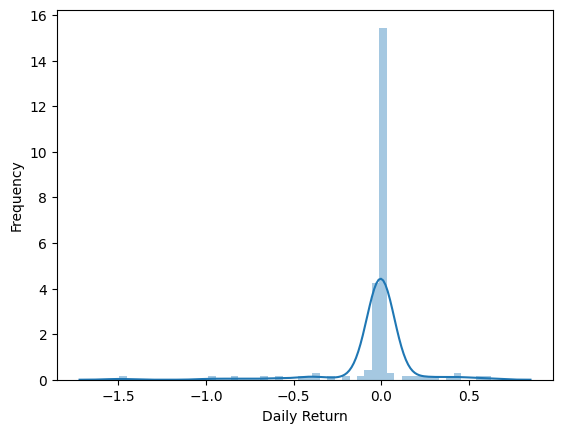

In [ ]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

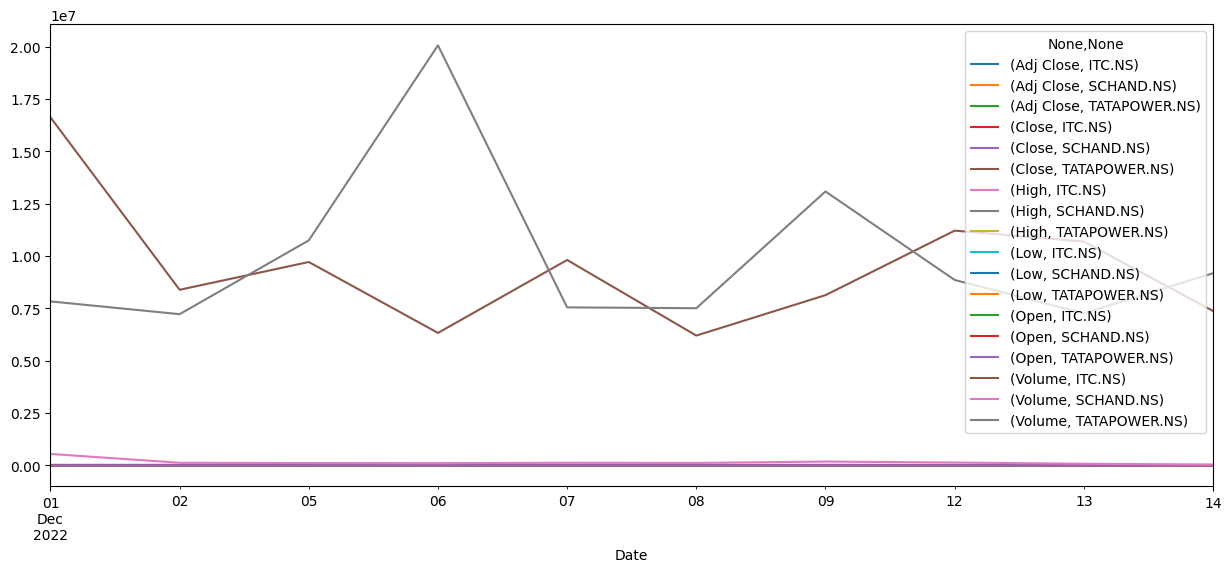

In [ ]:
data.plot(figsize=(15,6))

<Axes: xlabel='Date'>

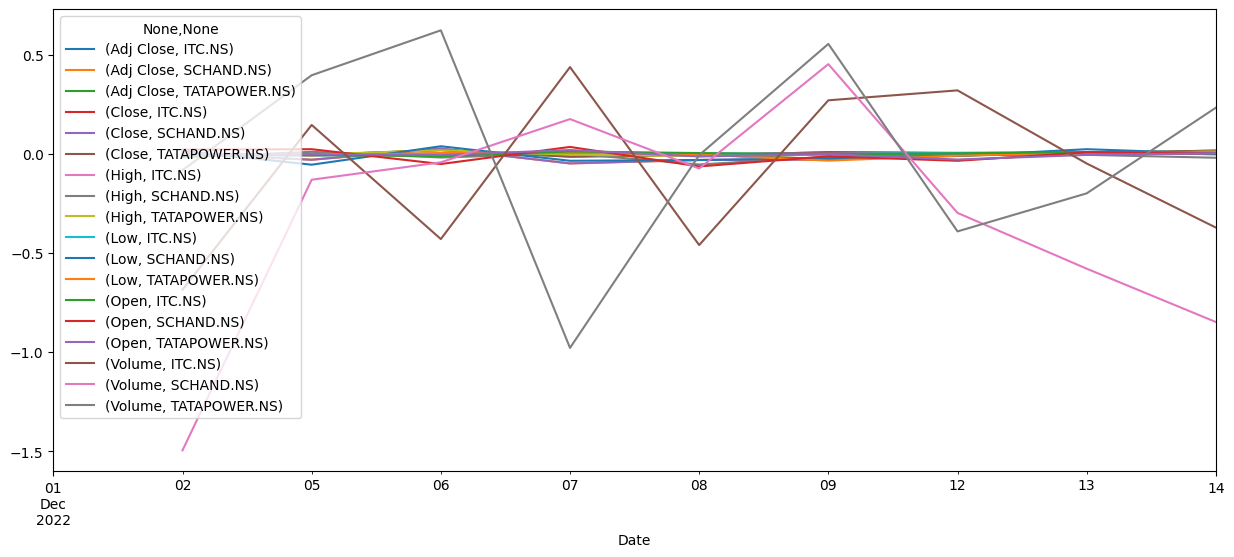

In [ ]:
log_returns.plot(figsize=(15,6))

In [ ]:
u = log_returns.mean()
var = log_returns.var()

In [ ]:
drift = u - (0.5*var)
drift

Adj Close  ITC.NS          0.001881
           SCHAND.NS      -0.010249
           TATAPOWER.NS   -0.001170
Close      ITC.NS          0.001881
           SCHAND.NS      -0.010249
           TATAPOWER.NS   -0.001170
High       ITC.NS          0.001811
           SCHAND.NS      -0.012188
           TATAPOWER.NS   -0.002048
Low        ITC.NS          0.002258
           SCHAND.NS      -0.007711
           TATAPOWER.NS   -0.002196
Open       ITC.NS          0.001358
           SCHAND.NS      -0.007277
           TATAPOWER.NS   -0.002804
Volume     ITC.NS         -0.172808
           SCHAND.NS      -0.486170
           TATAPOWER.NS   -0.111325
dtype: float64

In [ ]:
stddev = log_returns.std()

In [ ]:
x = np.random.rand(10,2)
x

array([[3.27335857e-04, 9.41906990e-01],
       [1.54889367e-01, 6.94754193e-01],
       [7.44806071e-01, 8.35636331e-01],
       [9.02952708e-01, 2.63113974e-01],
       [2.93190953e-03, 2.81948734e-01],
       [2.59511251e-01, 9.60628354e-01],
       [7.17099774e-01, 3.36951345e-01],
       [8.24492100e-01, 4.47782798e-01],
       [5.63713629e-01, 6.60402888e-01],
       [8.07109423e-02, 4.65793663e-01]])

In [ ]:
norm.ppf(x)

array([[-3.40789045,  1.57098549],
       [-1.01568643,  0.50937183],
       [ 0.65823388,  0.97668053],
       [ 1.29856113, -0.63377458],
       [-2.75530085, -0.57706216],
       [-0.64485292,  1.75802479],
       [ 0.57424732, -0.42079787],
       [ 0.93262078, -0.1312651 ],
       [ 0.16039143,  0.41356293],
       [-1.4003054 , -0.0858479 ]])

In [ ]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-0.21320051, -0.673536  ,  1.55170302, ..., -0.17895217,
        -1.13202154, -0.74856863],
       [ 1.53595413, -1.38850117, -1.03426434, ..., -0.58154568,
         0.45524858, -0.11046945],
       [-0.58593483, -1.54294517, -0.52643726, ...,  1.93467878,
         0.7570949 , -0.7955597 ],
       ...,
       [ 0.18468599, -0.49816074, -1.29112717, ..., -1.5392823 ,
        -1.75716411, -1.51689535],
       [ 0.79507483,  0.13453167, -0.31684122, ...,  0.219816  ,
         0.25859676, -0.47158403],
       [ 0.42566925,  0.91049181,  0.21720374, ..., -0.49966007,
         0.83449347,  0.88124273]])

In [ ]:
t_intervals = 1000
iterations = 10

In [ ]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

ValueError: ignored

In [ ]:
import numpy as np
from scipy.stats import norm

daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

ValueError: ignored